1) The data file diabetes.csv contains data of 768 patients. In this data there are 8 attributes
(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, and Age) and 1 response variable (Outcome). The response variable, Outcome, has binary value (1 indicating the outcome is diabetes and 0 means no diabetes).

For this assignment purposes we will consider this data as a population. Use this data to perform the following:

a) set a seed (to ensure work reproducibility) and take a random sample of 25 observations and
find the mean Glucose and highest Glucose values of this sample and compare these statistics
with the population statistics of the same variable. You should use charts for this comparison.
(5 points)

b) Find the 98th percentile of BMI of your sample and the population and compare the results
using charts. (5 points)

c) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the
population and find the average mean, standard deviation and percentile for BloodPressure and
compare this with these statistics from the population for the same variable. Again, you should
create charts for this comparison. Report on your findings. (10 points)

a) set a seed (to ensure work reproducibility) and take a random sample of 25 observations and
find the mean Glucose and highest Glucose values of this sample and compare these statistics
with the population statistics of the same variable. You should use charts for this comparison.

In [17]:
import pandas as pd
import numpy as np

#set a seed for reproducibility
np.random.seed(29)

# Load the data into a dataframe
file_path = '../data-raw/diabetes.csv'  
diabetes_data = pd.read_csv(file_path)

# The provided data is clean, however, I write the dataframe to the data-clean folder for clarity.
clean_file_path = '../data-clean/diabetes_clean.csv'

# Save the DataFrame to the new file
diabetes_data.to_csv(clean_file_path, index=False)


# Take a random sample of 25 observations
sample_size = 25
sample = diabetes_data.sample(sample_size)

# Display the sampled data
sample


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
280,0,146,70,0,0,37.9,0.334,28,1
6,3,78,50,32,88,31.0,0.248,26,1
462,8,74,70,40,49,35.3,0.705,39,0
53,8,176,90,34,300,33.7,0.467,58,1
365,5,99,54,28,83,34.0,0.499,30,0
137,0,93,60,25,92,28.7,0.532,22,0
269,2,146,0,0,0,27.5,0.240,28,1
254,12,92,62,7,258,27.6,0.926,44,1
549,4,189,110,31,0,28.5,0.680,37,0
357,13,129,0,30,0,39.9,0.569,44,1


In [7]:
# Find the mean glucose and highest glucose values in the sample

# SAMPLE
# Calculate mean Glucose value in the sample
mean_glucose_sample = sample['Glucose'].mean()

# Calculate the highest Glucose value in the sample
max_glucose_sample = sample['Glucose'].max()

# Display the results
print("Mean Glucose in Sample:", mean_glucose_sample)
print("Maximum Glucose in Sample:", max_glucose_sample)

# POPULATION
# Calculate mean Glucose value for the entire dataset (population)
mean_glucose_population = diabetes_data['Glucose'].mean()

# Calculate the highest Glucose value for the entire dataset (population)
max_glucose_population = diabetes_data['Glucose'].max()

# Display the results
print("Mean Glucose in Population:", mean_glucose_population)
print("Maximum Glucose in Population:", max_glucose_population)


Mean Glucose in Sample: 112.8
Maximum Glucose in Sample: 189
Mean Glucose in Population: 120.89453125
Maximum Glucose in Population: 199


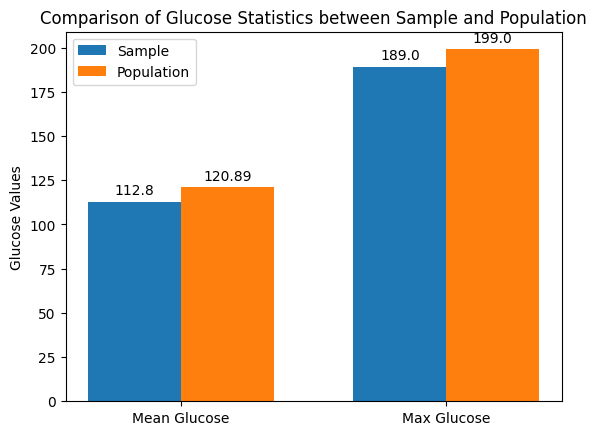

In [9]:
# Comparing the mean and max glucose values of the sample and population using bar charts

import matplotlib.pyplot as plt

# Data for plotting
categories = ['Mean Glucose', 'Max Glucose']
sample_values = [mean_glucose_sample, max_glucose_sample]
population_values = [mean_glucose_population, max_glucose_population]

x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

# Creating the bar chart
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sample_values, width, label='Sample')
rects2 = ax.bar(x + width/2, population_values, width, label='Population')

# Add some text for labels, title and custom x-axis tick labels
ax.set_ylabel('Glucose Values')
ax.set_title('Comparison of Glucose Statistics between Sample and Population')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Function to attach a text label above each bar
def autolabel(rects):
    # Attach a text label above each bar in *rects*, displaying its height.
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the function to attach the labels
autolabel(rects1)
autolabel(rects2)

# Show the plot
plt.show()



b) Find the 98th percentile of BMI of your sample and the population and compare the results
using charts.

In [10]:
# Calculate the 98th percentile of BMI in the sample
bmi_98th_percentile_sample = sample['BMI'].quantile(0.98)

# Calculate the 98th percentile of BMI in the population
bmi_98th_percentile_population = diabetes_data['BMI'].quantile(0.98)

# display results
print(bmi_98th_percentile_population)
print(bmi_98th_percentile_sample)

47.52599999999996
43.488


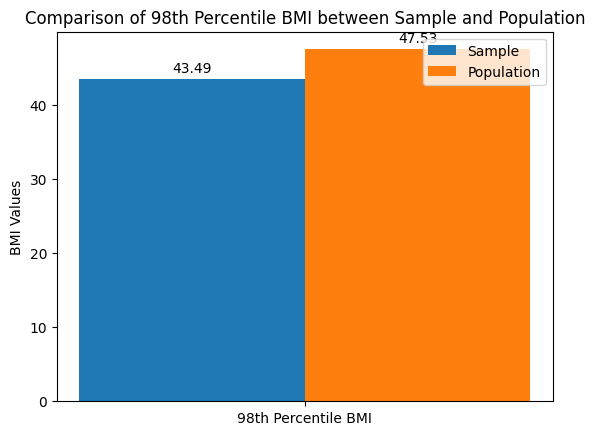

In [12]:
# Data for plotting
categories = ['98th Percentile BMI']
sample_values = [bmi_98th_percentile_sample]
population_values = [bmi_98th_percentile_population]

x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

# Creating the bar chart
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sample_values, width, label='Sample')
rects2 = ax.bar(x + width/2, population_values, width, label='Population')

# Add some text for labels, title and custom x-axis tick labels
ax.set_ylabel('BMI Values')
ax.set_title('Comparison of 98th Percentile BMI between Sample and Population')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Function to attach a text label above each bar
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the function to attach the labels
autolabel(rects1)
autolabel(rects2)

# Show the plot
plt.show()



c) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the
population and find the average mean, standard deviation and percentile for BloodPressure and
compare this with these statistics from the population for the same variable. Again, you should
create charts for this comparison. Report on your findings.

In [14]:
from scipy import stats

# Number of bootstrap samples and size of each sample
n_bootstrap_samples = 500
sample_size = 150

# Store the statistics for each bootstrap sample
means = []
std_devs = []
percentiles = []  # Store the average percentiles for each sample

for _ in range(n_bootstrap_samples):
    # Create a bootstrap sample with replacement
    bootstrap_sample = diabetes_data.sample(sample_size, replace=True)
    
    # Calculate the mean and store it
    sample_mean = bootstrap_sample['BloodPressure'].mean()
    means.append(sample_mean)

    # Calculate the standard deviation and store it
    sample_std_dev = bootstrap_sample['BloodPressure'].std()
    std_devs.append(sample_std_dev)

    # Determine the percentile rank of the sample mean within the population distribution
    percentile_rank = stats.percentileofscore(diabetes_data['BloodPressure'], sample_mean)
    percentiles.append(percentile_rank)

# Calculate the average of the means, standard deviations, and percentile ranks
average_mean = np.mean(means)
average_std_dev = np.mean(std_devs)
average_percentile_rank = np.mean(percentiles)

# Display the average statistics from bootstrap samples
print("Average Mean from Bootstrap Samples:", average_mean)
print("Average Standard Deviation from Bootstrap Samples:", average_std_dev)
print("Average Percentile Rank from Bootstrap Samples:", average_percentile_rank)

Average Mean from Bootstrap Samples: 69.22910666666668
Average Standard Deviation from Bootstrap Samples: 19.061050578268684
Average Percentile Rank from Bootstrap Samples: 42.629427083333326


Noting that this 42.63 average percentile for the bootstrap sample means could indicate a right skew in the data for blood glucose but could also be a product of the distribution shape, sampling method, or other contextual factors.

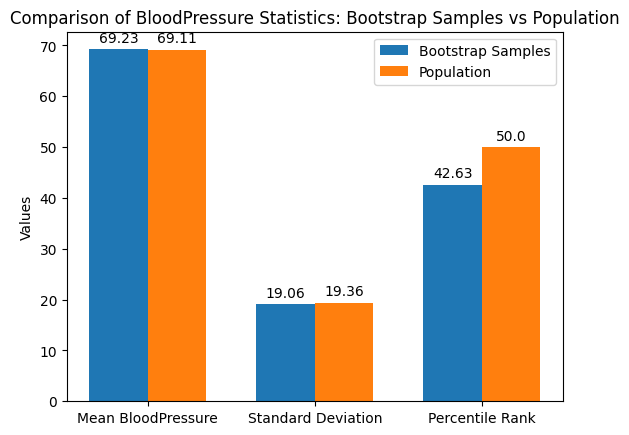

In [16]:
# Comparing to the population

# Population statistics for BloodPressure
population_mean = diabetes_data['BloodPressure'].mean()
population_std_dev = diabetes_data['BloodPressure'].std()

# Since the average percentile rank is a comparison to the population,
# the equivalent population value would be 50 (the median)
population_percentile_rank = 50

# Data for plotting
categories = ['Mean BloodPressure', 'Standard Deviation', 'Percentile Rank']
bootstrap_values = [average_mean, average_std_dev, average_percentile_rank]
population_values = [population_mean, population_std_dev, population_percentile_rank]

x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

# Creating the bar chart
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, bootstrap_values, width, label='Bootstrap Samples')
rects2 = ax.bar(x + width/2, population_values, width, label='Population')

# Add some text for labels, title and custom x-axis tick labels
ax.set_ylabel('Values')
ax.set_title('Comparison of BloodPressure Statistics: Bootstrap Samples vs Population')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Function to attach a text label above each bar
def autolabel(rects):
    # Attach a text label above each bar in *rects*, displaying its height.
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the function to attach the labels
autolabel(rects1)
autolabel(rects2)

# Show the plot
plt.show()

